In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, pi, sin, cos
import random

# Q(1) Perceptron Algorithm :

## 2-D Dataset Creation with different level of separability

In [2]:
def generate_dataset(gamma, i):
    """ gamma = level of separability, i = seed number
    returns the dataset generated X = (x_cordinate, y_cordinate)
    y = true labels
    """
    np.random.seed(i)
    x = np.random.rand(1200, 2)        # lies b/w 0 and 1
    x_list = []
    x1_list = []
    x2_list = []
    y_list = []
    scale = 15 
    x = x*scale                        # lies b/w 0 and 15
    # 6y = 7x - c , 6y = 7x + c1,  6y = 7x - c2

    factor = gamma*sqrt(1+(7/6)**2)                    # using the co ordinate geometry formula 
    c1 = -2 + factor
    c2 = -2 - factor

    for i in range(len(x)): 
        if(7*x[i,0] + c1) < 6*x[i,1]:               # if it is below the line 6y - 7x - c1 then classify -1
            x1_list.append([x[i,0], x[i,1]])
            x_list.append([x[i,0], x[i,1], 1])
            y_list.append(-1)

        elif(7*x[i,0] + c2) > 6*x[i,1]:            # if it is below the line 6y - 7x + c2 then classify +1
            x2_list.append([x[i,0], x[i,1]])  
            x_list.append([x[i,0], x[i,1], 1])
            y_list.append(1)

    X = np.array(x_list, dtype='object')  # x is a 2D numpy array(input)
    y = np.array(y_list, dtype='object')  # y is a numpy array(output)
    X1 = np.array(x1_list)
    X2 = np.array(x2_list)
               
    return X, y, X1, X2


## Defining a function for plotting the dataset with the classifier before and after training

In [3]:
# Plotting the graph before AND after training :
def plot_before_and_after(X1, X2, W, gamma):
    x_ = np.linspace(0, 15, 15)
    w1 = np.zeros(15,) 
    
    fig = plt.figure(figsize=(14, 8))
    plt.subplot(1, 2, 1)
    plt.plot(x_ , w1 , '-r', label='Initial W')
    plt.title('Graph of W before training')
    plt.xlabel('X axis (x1)')
    plt.ylabel('Y axis (x2)')
    plt.legend(loc='upper left')
    plt.scatter(X1[:,0], X1[:,1])
    plt.scatter(X2[:,0], X2[:,1])
    plt.grid()
    
    w2 = -(W[0]/W[1])*x_ - (W[2]/W[1])
    
    plt.subplot(1, 2, 2)
    plt.plot(x_ , w2 , '-r', label='New W')
    plt.title('Graph of W after training')
    plt.xlabel('X axis (x1)')
    plt.ylabel('Y axis (x2)')
    plt.legend(loc='upper left')
    plt.scatter(X1[:,0], X1[:,1])
    plt.scatter(X2[:,0], X2[:,1])
    
    plt.rc('axes', titlesize = 12)         # fontsize of the axes title
    plt.rc('figure', titlesize=16)         # fontsize of the figure title
    
    fig.suptitle(f"Gamma = {gamma}", fontweight='bold')
    plt.tight_layout()
    plt.grid()
    plt.show()
    


## Defining the perceptron algorithm and it's helper function

In [4]:
def prediction(x, W):    # x = [x1, x2, 1]
    return x.dot(W)      # W = [w1, w2, b]    Pred => (w1*x1 + w2*x2 + b) equivalent to (ax1 + by1 + c) at point (x1, y1)


def perceptron_algo(X, y, W, max_epochs):
    n_samples = X.shape[0]
    n_iterations = 0
    for epoch in range(max_epochs):
        n_misclass = 0
        for i in range(n_samples):
            n_iterations += 1
            if prediction(X[i], W) * y[i] <= 0:
                W = W + y[i]*X[i]                    # perceptron update rule
                n_misclass += 1                      # there exist a misclassification => increase by 1
        
        if n_misclass == 0:
            break
            
    return W, n_iterations
    

## Different values of gamma and generate 5 different datasets for each gamma
- And we compute the average value of k(avg. no. of iterations) for each level of γ, and do this for 5 values of γ.

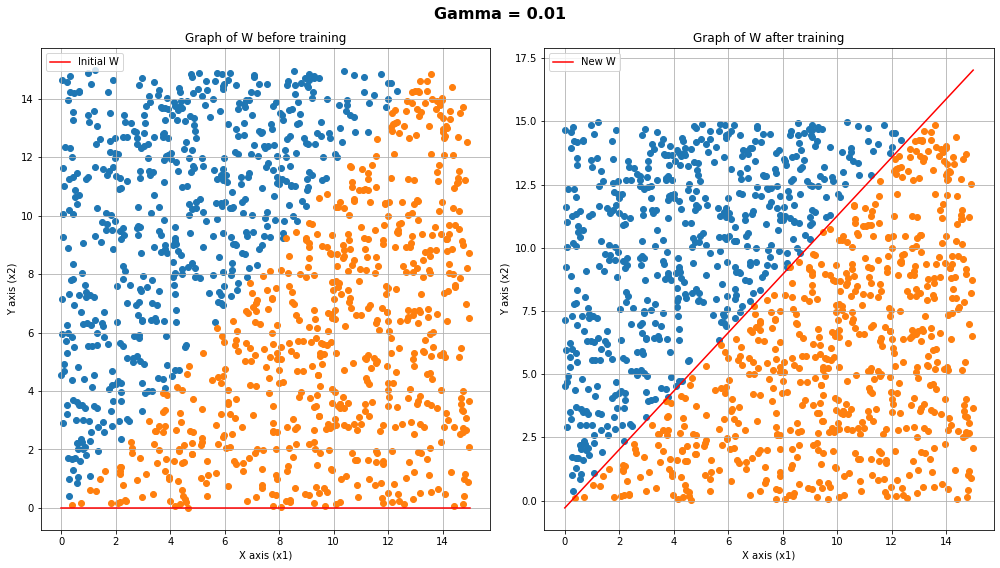

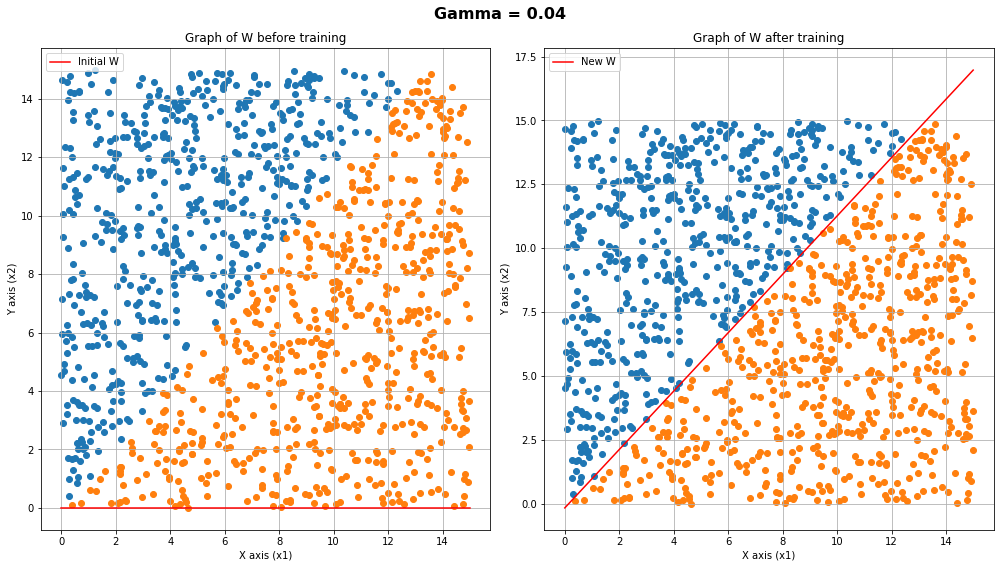

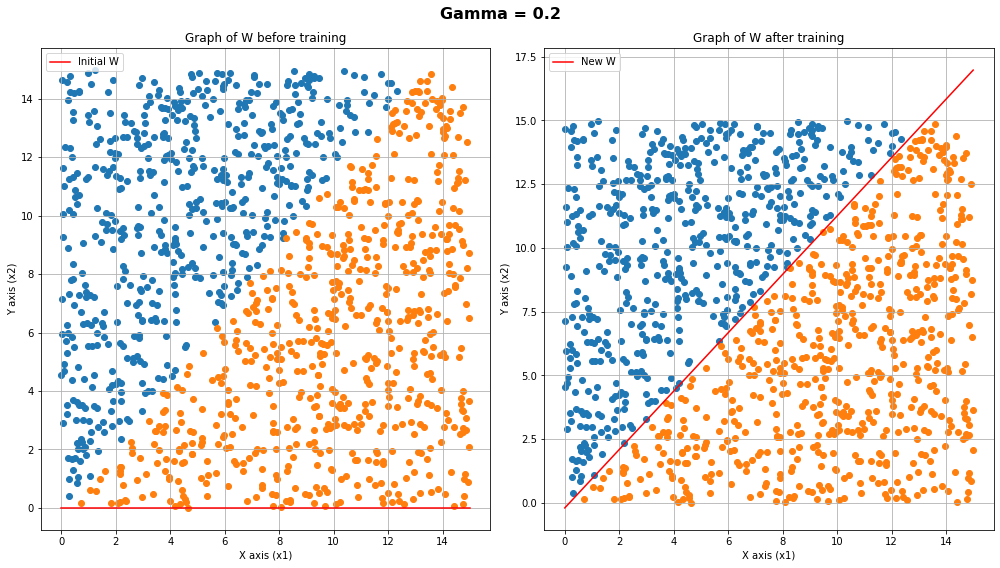

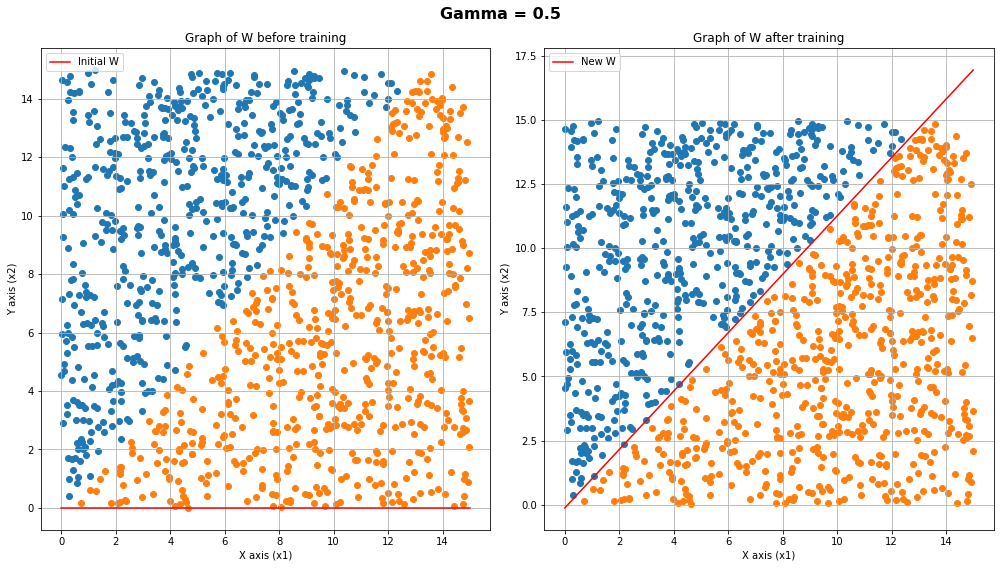

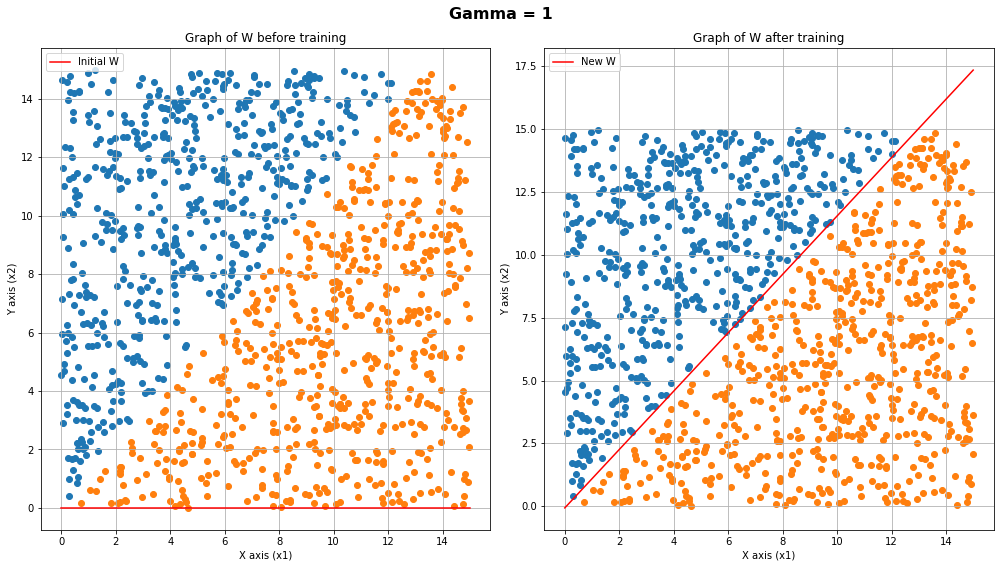

In [5]:
# different values of gamma
gammas = [0.01, 0.04, 0.2, 0.5, 1]
avg_iteration_list = []

for gamma in gammas:
    iter_list = []
    for i in range(5):
        X, y, X1, X2 = generate_dataset(gamma, i)
        W = np.zeros(X.shape[1])                         # x.shape = (1077 X 3) = (n_samples x (features + 1))
        W, n_iterations = perceptron_algo(X, y, W, 100)
        iter_list.append(n_iterations)
        if(i == 1):
            plot_before_and_after(X1, X2, W, gamma)                 # plot only one instance for each gamma when seed = 1
    
    iter_list = np.array(iter_list)
    avg = np.mean(iter_list)
    avg_iteration_list.append(avg)

## Plotting the no. of iterations taken for each level of γ

Text(0, 0.5, 'Avg. No. of iterations(k)')

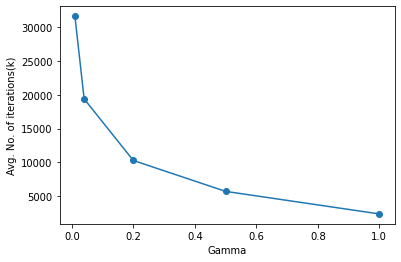

In [6]:
gammas = np.array(gammas)
avg_iteration_list = np.array(avg_iteration_list)

plt.plot(gammas, avg_iteration_list, marker = 'o')
plt.xlabel('Gamma')
plt.ylabel('Avg. No. of iterations(k)')



## Observation :
- As discussed in the class, we observe that as gamma(the level of separability) increases, the no. of iterations needed by the perceptron algorithm to correctly classify every point decreases
-  Clearly the plot also supports the ab0ve statement.
- Although for some kind of datasets, it may happen that the no. of iterations for correct classification of a lower gamma value is lower than that of a higher gamma values, hence we average it out over 5 different datasets before concluding

# Question(2) : Gradient Descent

## 2-D linearly seperable Dataset Creation using gamma(level of separability)

In [7]:
def generate_dataset(gamma = 5):
    """ gamma = level of separability = 5 by default,
    returns the dataset generated X = (x_cordinate, y_cordinate)
    y = true labels
    """
    np.random.seed(24)
    x = np.random.rand(1200, 2) 
    x_list = []
    x1_list = []
    x2_list = []
    y_list = []
    scale = 15
    x = x*scale
    # 6y = 7x - c , 6y = 7x + c1,  6y = 7x - c2
    factor = gamma*sqrt(1+(7/6)**2)
    c1 = -2 + factor
    c2 = -2 - factor

    for i in range(len(x)):
        if(7*x[i,0] + c1) < 6*x[i,1]:
            x1_list.append([x[i,0], x[i,1]])
            x_list.append([x[i,0], x[i,1], 1])
            y_list.append(-1)

        elif(7*x[i,0] + c2) > 6*x[i,1]:
            x2_list.append([x[i,0], x[i,1]])  
            x_list.append([x[i,0], x[i,1], 1])
            y_list.append(1)

    X = np.array(x_list, dtype='object')  # x is a 3D numpy array(input) = x1, x2, 1
    y = np.array(y_list, dtype='object')  # y is a numpy array(output)
    X1 = np.array(x1_list)
    X2 = np.array(x2_list)

               
    return X, y, X1, X2

## Defining helper function -
- Loss Function - hinge loss
- Prediction function
- Fn to calculate gradient

In [8]:
def prediction(x, W):    # x = [x1, x2, 1]
    return x.dot(W)      # W = [w1, w2, b]    Pred => (w1*x1 + w2*x2 + b) equivalent to (ax1 + by1 + c) at point (x1, y1)


def smooth_hinge_loss(xi , yi , W):    # y ={1, -1} is a scalar while xi , W are vectors
    """Smooth hinge loss
        Args:
            xi (ndarray): input vectors
            W (ndarray): weight vectors
        Returns:
            yi : Output the loss 
    """
    pred = xi.dot(W)
    
    if(yi*pred <= 0):
        return 1/2 - yi*pred
    elif(yi*pred > 0) and (yi*pred < 1):
        return 1/2*(1-yi*pred)**2                      #  1/2*(1-yi*w.xi)^2
    
    return 0


def calculate_gradient(xi, yi, W):
    """ Returns the partial derivative of the loss function w.r.t
    each of the parameters as a numpy array i.e gradient of L w.r.t W  """
    pred = xi.dot(W)
    
    if(yi*pred <= 0):
        return -yi*xi                  # -yi[x1 x2 1]
    
    elif(yi*pred > 0) and (yi*pred < 1):
        return (1 - yi*pred)*(-yi*xi)                      # (1 - yi*pred)*-yi[x1 x2 1]
    
    return np.zeros(3)
    

## Defining the function for gradient descent 

In [9]:
def gradient_descent(X, y, W, alpha, max_epochs = 40):
    n_iters = 0
    n_samples = X.shape[0]
    dLdW = np.zeros(3)
    
    for epoch in range(max_epochs):
        for i in range(n_samples):
            dldW = calculate_gradient(X[i], y[i], W)
            dLdW = dLdW + dldW
          
        step_size = alpha*dLdW
        
        # update step
        W = W - step_size
    
    return W

## Defining a function for plotting the dataset with the classifier before and after training

In [10]:
# Plotting the graph before training :
def plot_before_and_after(X1, X2, W, gamma):
    x_ = np.linspace(0, 15, 15)
    
    w1 = np.zeros(15,)                  # inital w 
    fig = plt.figure(figsize=(18, 10))
    plt.subplot(1, 2, 1)
    plt.plot(x_ , w1 , '-r', label='Initial W')
    plt.title('Graph of W before training')
    plt.xlabel('X axis (x1)')
    plt.ylabel('Y axis (x2)')
    plt.legend(loc='upper left')
    plt.scatter(X1[:,0], X1[:,1])
    plt.scatter(X2[:,0], X2[:,1])
    plt.grid()
    
    w2 = -(W[0]/W[1])*x_ - (W[2]/W[1])       # trained w
    plt.subplot(1, 2, 2)
    plt.plot(x_ , w2 , '-r', label='New W')
    plt.title('Graph of W after training')
    plt.xlabel('X axis (x1)')
    plt.ylabel('Y axis (x2)')
    plt.legend(loc='upper left')
    plt.scatter(X1[:,0], X1[:,1])
    plt.scatter(X2[:,0], X2[:,1])
    
    plt.rc('axes', titlesize = 12)     # fontsize of the axes title
    plt.rc('figure', titlesize=16)  # fontsize of the figure title
    
    fig.suptitle(f"Gamma = {gamma}", fontweight='bold')
    plt.tight_layout()
    plt.grid()
    plt.show()

## Gradient Descent for Gamma = 5

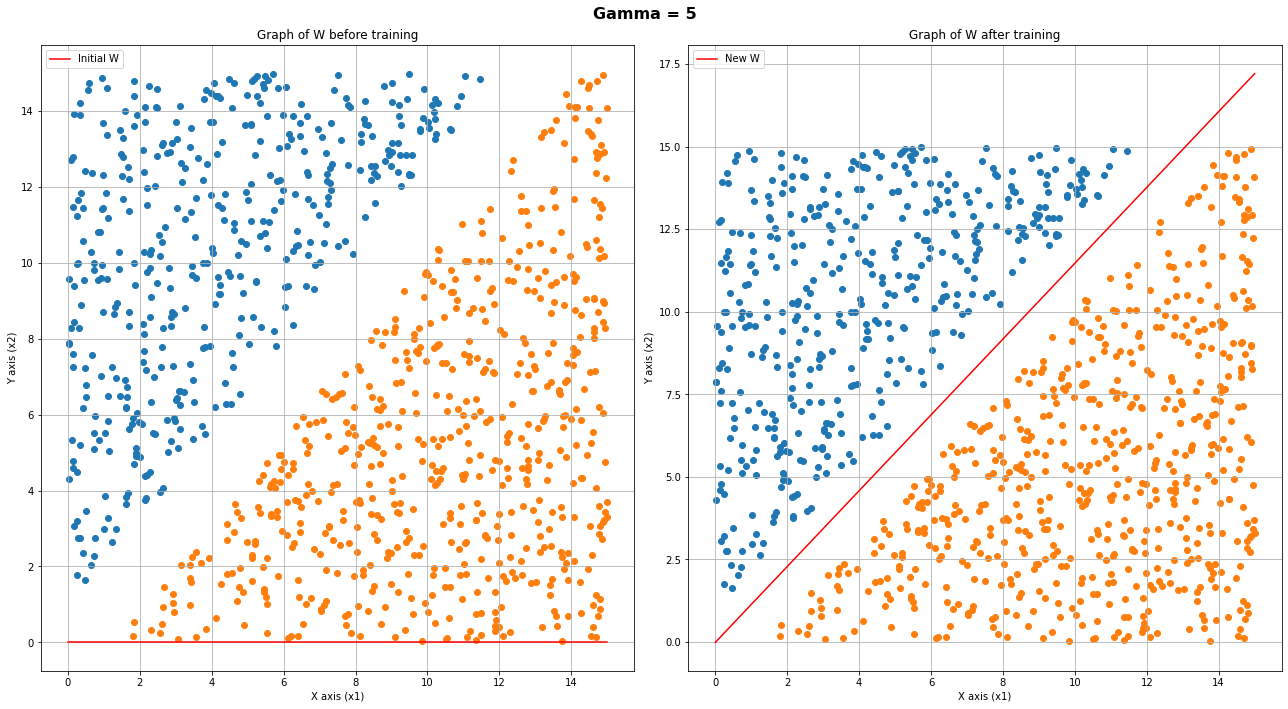

In [11]:
# initialise some parameters : W = [w1,w1,b] = parameters , learning rate = alpha,        X = [x1,x2,1] 
# Pred => (w1*x1 + w2*x2 + b) equivalent to (ax1 + by1 + c) at point (x1, y1)

# parameters
gamma = 5
W = np.zeros(X.shape[1])   # x.shape = (1077 X 3) = (n_samples x (features + 1))  
alpha = 0.01               # learning rate

X, y, X1, X2 = generate_dataset(gamma)

W = gradient_descent(X, y, W, alpha)
plot_before_and_after(X1, X2, W, gamma)

## Gradient Descent for Gamma = 1 

In [12]:
gamma = 1
X, y, X1, X2 = generate_dataset(gamma) 

W = np.zeros(X.shape[1])   # x.shape = (1077 X 3) = (n_samples x (features + 1))  
alpha = 0.01               # learning rate

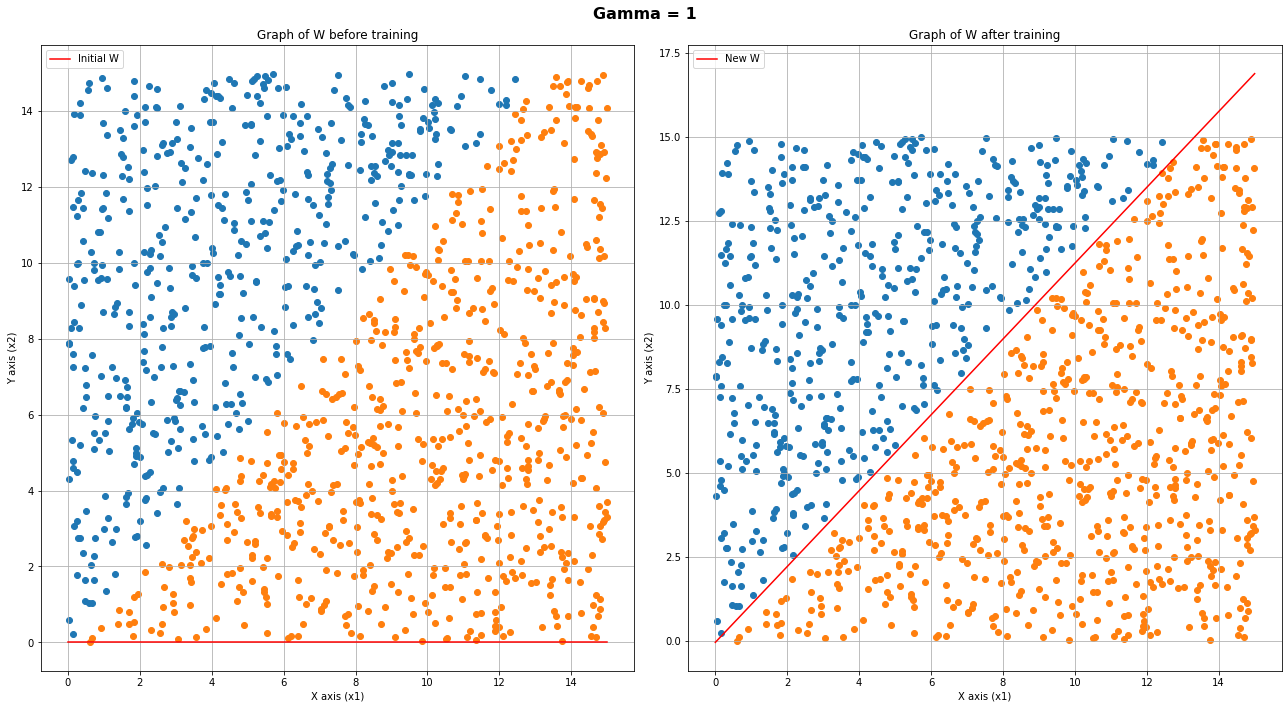

In [13]:
W = gradient_descent(X, y, W, alpha, max_epochs = 250)
plot_before_and_after(X1, X2, W, gamma)

# Q(3) MLP with a single hidden layer

## Dataset Creation : Non linearly separable

In [14]:
# Initialise parameters : d = |r2 - r1| 
d = 0.5
circle_r = 5
random.seed(24)

def generate_data(circle_r = 5 , c_centre_x1 = 0, c_centre_x2 = 0, outer_c_r = circle_r + d):
    """ It generates random data lying inside an inner circle and some random data 
            outside the outer circle radius in a concentric fashion
     where d = |r2 - r1| = level of separation. 
                                                                        """
    # radius of the circle
    # center of the circle (cirle_x1, circle_x2)
    circle_x1 = c_centre_x1
    circle_x2 = c_centre_x2
    pos = []
    neg = []
    datas = []
    labels = []

    for i in range(2000):           # generate 2000 datsets each of label 1 and -1
        # random angle
        alpha = 2 * pi * random.random()
        # random radius < circle_r
        r = circle_r * sqrt(random.random())
        # calculating coordinates
        x1 = r * cos(alpha) + circle_x1
        x2 = r * sin(alpha) + circle_x2
        pos.append([x1, x2])                        # positive points would lie inside circle of specified radius 
        datas.append([x1, x2, 1])
        labels.append(1)

        
        beta = 2 * pi * random.random()
        x1_ = (outer_c_r + r) * cos(beta) + circle_x1         # neg points would lie outside 
        x2_ = (outer_c_r + r) * sin(beta) + circle_x2   
        neg.append([x1_, x2_])
        datas.append([x1_, x2_, 1])                     # appending 1 to the input so as to add bias to the hidden layer
        labels.append(-1)
        

    X = np.array(datas, dtype='object')
    X1 = np.array(pos, dtype='object')
    X2 = np.array(neg, dtype='object')
    y = np.array(labels, dtype='object')
    
    return X, y, X1, X2



## Get the datasets and print some sample X, y

In [15]:
# get the dataset generated from the function
X, y, X1, X2 = generate_data(circle_r)
X = X.astype(float)

# print sample data
print(X[:5])
print(y[:5])

[[-1.07404844 -4.45437014  1.        ]
 [ 4.14359409  9.19118843  1.        ]
 [ 2.20268518 -0.02376915  1.        ]
 [-3.67319355 -6.770597    1.        ]
 [ 3.64844597  2.37323968  1.        ]]
[1 -1 1 -1 1]


In [16]:
# Function for Plotting the dataset before training :
def plot(X1, X2):
    
    fig = plt.figure(figsize=(12, 10))
    plt.title('Non-linearly separabale dataset')
    plt.xlabel('X axis (x1)')
    plt.ylabel('Y axis (x2)')
    plt.scatter(X1[:,0], X1[:,1])
    plt.scatter(X2[:,0], X2[:,1])
    plt.grid()
    
    plt.rc('axes', titlesize = 12)     # fontsize of the axes title
    plt.rc('figure', titlesize = 16)  # fontsize of the figure title
    
    fig.suptitle("Dataset before training", fontweight='bold')
    plt.plot()
    plt.show()

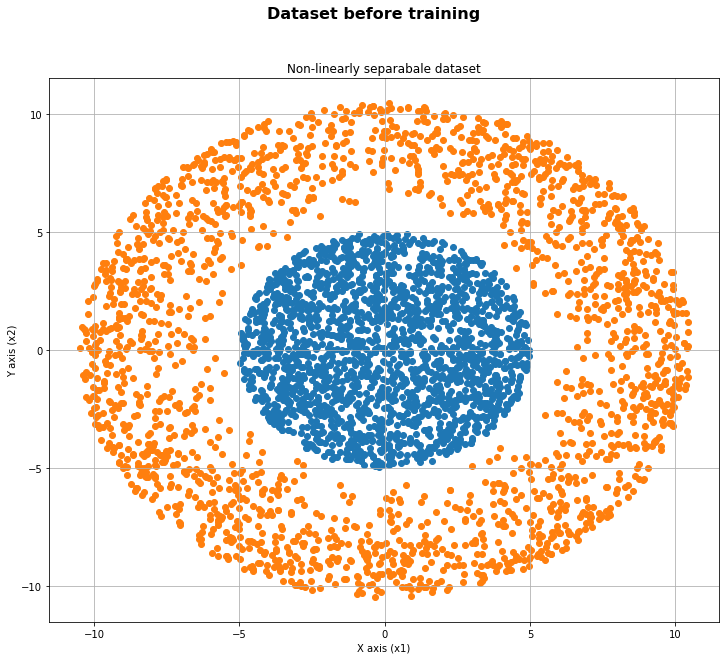

In [17]:
plot(X1, X2)

## Random Train test split

In [18]:
np.random.seed(0)
id_list = list(range(len(X)))
split_ratio = 0.8
split_index = int(len(X)*split_ratio)
random.shuffle(id_list)
id_train = id_list[0:split_index]
id_test = id_list[split_index:]

y = y.reshape(y.size, 1)
X_train = X[id_train]
X_test = X[id_test]

y_train = y[id_train]
y_test = y[id_test]

print(f"Sample train X data : - \n {X_train[:5]}")
print(f"Sample train labels :- \n {y_train[:5]}")
print(f"Sample train X data :-\n {X_test[:5]}")
print(f"Sample train labels :-\n {y_test[:5]}")


Sample train X data : - 
 [[ 2.06440143 10.08340139  1.        ]
 [ 1.93101642 -0.06433408  1.        ]
 [10.05925197 -0.25658866  1.        ]
 [-4.96313283 -0.5513468   1.        ]
 [-5.52956157  7.31186037  1.        ]]
Sample train labels :- 
 [[-1]
 [1]
 [-1]
 [1]
 [-1]]
Sample train X data :-
 [[-8.67159284  5.72063349  1.        ]
 [-4.12602816 -8.58663793  1.        ]
 [ 6.74453946 -1.47349897  1.        ]
 [ 2.83960991 -2.02973888  1.        ]
 [-1.82803106 -4.04255826  1.        ]]
Sample train labels :-
 [[-1]
 [-1]
 [-1]
 [1]
 [1]]


##  Some implementation details
- Activation fn at hidden layer -> ReLU , at output layer -> sigmoid 
- Loss fn used : Hinge loss

In [19]:
from random import random

################ ------ TO DO --------- ###############

# 1. save activations and derivatives
# 2. derive the relatioin b/w derivatives w.r.t weights and activations and all...
# 3. implement backpropagation
# 4. implement gradient descent
# 5. implement TRAIN (bprop + gdescent)
# 6. train our net with some dummy dataset (here (a,b) and (a+b))
# 6. make some prediction

################ ------  DONE  --------- ###############



class MLP(object):
    """A Multilayer Perceptron class.
    """

    def __init__(self, num_inputs=3, hidden_layers=[3, 3], num_outputs=2):
        """Constructor for the MLP. Takes the number of inputs,
            a variable number of hidden layers, and number of outputs

        Args:
            num_inputs (int): Number of inputs
            hidden_layers (list): A list of ints for the hidden layers
            num_outputs (int): Number of outputs
        """

        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs

        # create a generic representation of the layers
        layers = [num_inputs] + hidden_layers + [num_outputs]

        # create random connection weights for the layers
        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        # save derivatives per layer
        derivatives = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            derivatives.append(d)
        self.derivatives = derivatives

        # save activations per layer
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations


    def forward_propagate(self, inputs):
        """Computes forward propagation of the network based on input signals.

        Args:
            inputs (ndarray): Input signals
        Returns:
            activations (ndarray): Output values
        """

        # the input layer activation is just the input itself
        activations = inputs

        # save the activations for backpropogation
        self.activations[0] = activations

        w = self.weights
        net_inputs1 = np.dot(activations, w[0])

        # apply relu activation function
        activations1 = self.ReLU(net_inputs1)

        # save the activations for backpropogation
        self.activations[1] = activations1
        
        net_inputs2 = np.dot(activations1, w[1])
        
        # apply sigmoid activation function
        activations2 = self.sigmoid(net_inputs2)

        # save the activations for backpropogation
        self.activations[2] = activations2
        
        # return output layer activation
        return activations2


    def back_propagate(self, error):
        """Backpropogates an error signal.
        Args:
            error (ndarray): The error to backprop.
        Returns:
            error (ndarray): The final error of the input
        """
        # dl/dw2  = -y t'(h[3]) (a[2])
        #           = 0
        # s'(h[3]) = s(h[3])s(h[3])
        # s[h[3]] = a[3]
        
        
        # iterate backwards through the network layers
        for i in reversed(range(len(self.derivatives))):

            # get activation for previous layer
            activations = self.activations[i+1]                         


            # apply sigmoid derivative function if output layer
            # else apply ReLU derivative function

            if i == (len(self.derivatives) - 1):                               # if output layer
                upstream = error * self.sigmoid_derivative(activations)             # activation = sigmoid()  
            else:                                                              # if hidden layers
                upstream = error * self.ReLU_derivative(activations)                # activations = relu() 
            
            # reshape upstream as to have it as a 2d array
            upstream_re = upstream.reshape(upstream.shape[0], -1).T

            # get activations for current layer
            current_activations = self.activations[i]

            # reshape activations as to have them as a 2d column matrix
            current_activations = current_activations.reshape(current_activations.shape[0],-1)

            # save derivative after applying matrix multiplication
            self.derivatives[i] = np.dot(current_activations, upstream_re)

            # backpropogate the next error
            error = np.dot(upstream, self.weights[i].T)

        


    def train(self, inputs, targets, epochs, learning_rate):
        """Trains model running forward prop and backprop
        Args:
            inputs (ndarray): X
            targets (ndarray): Y
            epochs (int): Num. epochs we want to train the network for
            learning_rate (float): Step to apply to gradient descent
        """
        # now enter the training loop
        for i in range(epochs):
            sum_errors = 0
            count = 0                                     # to keep track of the correct classifications
            # iterate through all the training data
            for j, input in enumerate(inputs):
                target = targets[j]

                # activate the network! and get the predicted output (which lies b/w 0 and 1)
                output = self.forward_propagate(input)
                
                k = -1
                if output > 0.5 :  # if the sigmoid activated output is > 0.5 , assign the label as 1 
                    k = 1
                     
                if k == target :
                    count = count + 1
                
                 # error that is to be backpropogated (since using hinge loss)
                if(target*output < 1):
                    error = - target                          
                else:
                    error = 0.0
                
                self.back_propagate(error)

                # now perform gradient descent on the derivatives (this will update the weights)
                self.gradient_descent(learning_rate)

                # keep track of the hinge loss for reporting later
                sum_errors += self.hinge_loss(target, output)
            
            # print the accuracy on the train data at every 5th iteration
            if i%5 == 0 :
                print("epoch :" , i)
                print("accuarcy on training data :",count/len(X_train))
                
            # Epoch complete, report the training error
            print("Error: {} at epoch {}".format(sum_errors / len(X_train), i+1))

        print("Training complete!")
        print("=====")


        
    def accuracy(self, inputss , targetss) :
        count = 0
        for j, input in enumerate(inputss):
            target = targetss[j]

            # activate the network! and get the predicted output (which lies b/w 0 and 1)
            output = self.forward_propagate(input)

            k = -1
            if output > 0.5 :  # if the sigmoid activated output is > 0.5 , assign the label as 1 
                k = 1

            if k == target:
                count = count + 1

        
        print("Accuarcy on the test data :", count/len(inputss))

    
    
        
    def gradient_descent(self, learningRate=0.01):
        """Learns by descending the gradient
        Args:
            learningRate (float): How fast to learn.
        """
        # update the weights by stepping down the gradient
        for i in range(len(self.weights)):
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            self.weights[i] = self.weights[i] - derivatives * learningRate

    
    def ReLU(self, x):
        """Relu activation function
        Args:
            x (float): array of inputs
        Returns:
            y (float): Output
        """
        return np.maximum(x, 0)        # apply element wise maximum


    

    def ReLU_derivative(self, x):
        """relu derivative function
        Args:
            x (float): Value to be processed i.e relu itself x = relu(x)
        Returns:
            y (float): Output
        """
        return 1. * (x > 0)              # relu(x) > 0 <=> x > 0 -- element wise ---   if(x > 0) return 1
#                                                                                       else     return 0

    
    def sigmoid(self, x):
        """Sigmoid activation function
        Args:
            x (float): Value to be processed
        Returns:
            y (float): Output
        """
        x = x.astype(float)
        y = 1.0 / (1 + np.exp(-x))
        return y


    def sigmoid_derivative(self, x):
        """Sigmoid derivative function
        Args:
            x (float): Value to be processed
        Returns:
            y (float): Output
        """
        return x * (1.0 - x)
    
    
    
    def hinge_loss(self, target, output):
        """Hinge loss function
        Args:
            target (ndarray): The ground trut
            output (ndarray): The predicted values
        Returns:
            (float): Output
        """
        if(target*output > 1):
            return 0
        else:
            return (1 - output*target)




## Train the network with the training data : For various cases 
- When hidden layer has 4 neurons
- When hidden layer has 8 neurons

In [20]:
# parameters
n_epochs = 100
lr = 0.1

# create a Multilayer Perceptron with one hidden layer, 3 input neurons , 1 output neuron
mlp = MLP(3, [4], 1)

# train network 
mlp.train(X_train, y_train, n_epochs, lr)


epoch : 0
accuarcy on training data : 0.61
Error: [0.9496248828137455] at epoch 1
Error: [0.8357611180985584] at epoch 2
Error: [0.7262720900514223] at epoch 3
Error: [0.5998640470259358] at epoch 4
Error: [0.5834210893986507] at epoch 5
epoch : 5
accuarcy on training data : 0.9496875
Error: [0.5526123727559105] at epoch 6
Error: [0.5852410622460835] at epoch 7
Error: [0.5688827316644814] at epoch 8
Error: [0.5489087917620631] at epoch 9
Error: [0.5674938973227516] at epoch 10
epoch : 10
accuarcy on training data : 0.95875
Error: [0.5447297672786057] at epoch 11
Error: [0.5474456903254488] at epoch 12
Error: [0.5471000682580571] at epoch 13
Error: [0.5410396819895708] at epoch 14
Error: [0.5651997843002687] at epoch 15
epoch : 15
accuarcy on training data : 0.9640625
Error: [0.5390963820216872] at epoch 16
Error: [0.5739645252453328] at epoch 17
Error: [0.5100439279250621] at epoch 18
Error: [0.55976290373246] at epoch 19
Error: [0.5437801115818091] at epoch 20
epoch : 20
accuarcy on t

C:\Users\user\AppData\Local\Temp\ipykernel_18128\126701464.py:259: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1 + np.exp(-x))


Error: [0.5722406316992348] at epoch 29
Error: [0.5299936031208055] at epoch 30
epoch : 30
accuarcy on training data : 0.988125
Error: [0.5143281402060116] at epoch 31
Error: [0.5097269014142649] at epoch 32
Error: [0.5363782095623213] at epoch 33
Error: [0.5169908657224439] at epoch 34
Error: [0.5515104622022855] at epoch 35
epoch : 35
accuarcy on training data : 0.9303125
Error: [0.5718590125801967] at epoch 36
Error: [0.55140686356394] at epoch 37
Error: [0.5093577883894899] at epoch 38
Error: [0.532117874591549] at epoch 39
Error: [0.5336596257979989] at epoch 40
epoch : 40
accuarcy on training data : 0.993125
Error: [0.5094191258475308] at epoch 41
Error: [0.5554100748902987] at epoch 42
Error: [0.5676908467192305] at epoch 43
Error: [0.5631958230785834] at epoch 44
Error: [0.5805134361713995] at epoch 45
epoch : 45
accuarcy on training data : 0.986875
Error: [0.5157872243698334] at epoch 46
Error: [0.5195844903004465] at epoch 47
Error: [0.5316065142304083] at epoch 48
Error: [0.

## Case 2 : hidden layer has 8 neurons

In [ ]:
# create a Multilayer Perceptron with one hidden layer, 3 input neurons , 1 output neuron
mlp2 = MLP(3, [8], 1)

# train network 
mlp2.train(X_train, y_train, n_epochs, lr)

## Prediction on test data

In [22]:
# calculating accuracy on testing data

# CASE 1
mlp.accuracy(X_test, y_test)

# CASE 2
mlp2.accuracy(X_test, y_test)
    



Accuarcy on the test data : 0.95
Accuarcy on the test data : 0.99875


C:\Users\user\AppData\Local\Temp\ipykernel_18128\126701464.py:259: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1 + np.exp(-x))


## Observations :
- More neurons in the hidden layer , more accuracy (for this task)
- Accuracy before training close to 50 % because weights are random and predictions too !